# Model info



In [1]:
%matplotlib inline

import sys
if ".." not in sys.path:
    sys.path.append("..")
import glob
import os
import mne
from keras import backend as K
from p300.preprocessing import normalize_subject, load_data

print("GPU's disponibles = {}".format(K.tensorflow_backend._get_available_gpus()))



/home/jmperez/.pyenv/versions/3.6.5/envs/p300/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


GPU's disponibles = ['/job:localhost/replica:0/task:0/device:GPU:0']


Targets appear as 2 in the third column


We remove last channel as well

In [3]:
from keras.models import load_model

model = load_model("models/model_cnn_1.h5")


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


In [4]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 104, 12)       180       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 104, 60)       9420      
_________________________________________________________________
flatten_1 (Flatten)          (None, 87360)             0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 87360)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               11182208  
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 11,191,937
Trainable params: 11,191,937
Non-trainable params: 0
________________________________________________________________

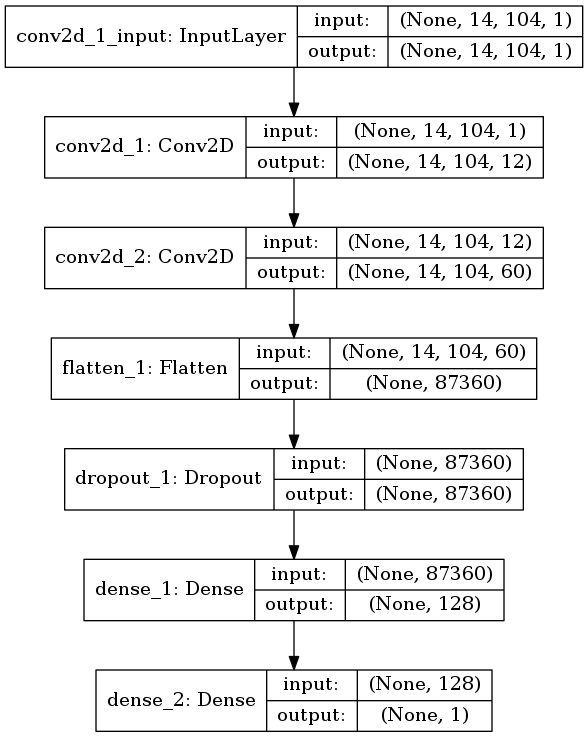

In [13]:
import keras.utils
from IPython.display import Image

layer = model.layers[0]

keras.utils.plot_model(model, to_file='model_vertical.svg', show_shapes=True)
keras.utils.plot_model(model, to_file='model_vertical.png', show_shapes=True)
Image('model_vertical.png')

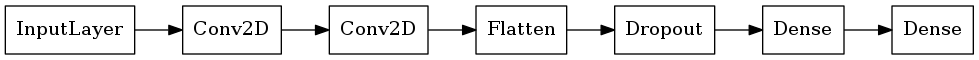

In [10]:
keras.utils.plot_model(model, 
                       to_file='model_horizontal.png', 
                       show_shapes=False, show_layer_names=False, rankdir="LR")
Image('model_horizontal.png')

In [15]:

layer.name = "PEPE"